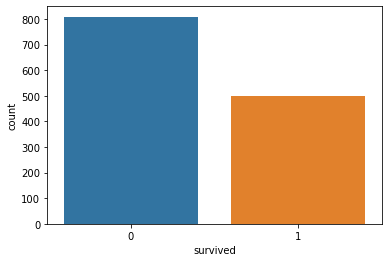

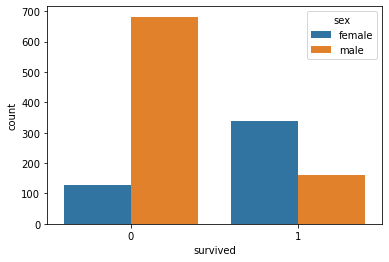

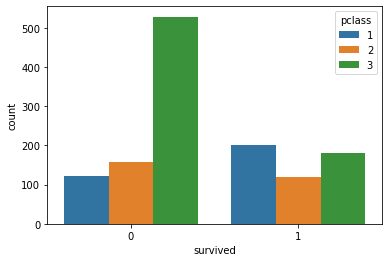

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7684478371501272

Confusion Matrix:
 [[197  27]
 [ 64 105]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.88      0.81       224
           1       0.80      0.62      0.70       169

    accuracy                           0.77       393
   macro avg       0.78      0.75      0.76       393
weighted avg       0.77      0.77      0.76       393



In [ ]:
# Exp-4 211P002
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


titanic_data = pd.read_csv('titanic.csv')
titanic_data.head()

titanic_data.isnull().sum()

titanic_data['age'].fillna(titanic_data['age'].mean(), inplace=True)
titanic_data['cabin'].fillna(titanic_data['cabin'].mode()[0], inplace=True)
titanic_data['embarked'].fillna(titanic_data['embarked'].mode()[0], inplace=True)
titanic_data['fare'].fillna(titanic_data['fare'].mean(), inplace=True)

titanic_data.isnull().sum()

sns.countplot(x='survived', data=titanic_data)
plt.show()

sns.countplot(x='survived', hue='sex', data=titanic_data)
plt.show()

sns.countplot(x='survived', hue='pclass', data=titanic_data)
plt.show()

titanic_data['age'].plot.hist()

titanic_data = pd.get_dummies(titanic_data, columns=['sex','embarked'])
titanic_data.head()

titanic_data.drop(['sex_female', 'embarked_C'], axis=1, inplace=True)
titanic_data.head()

X = titanic_data.drop('survived', axis=1).select_dtypes(exclude=['object'])
y = titanic_data['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, predictions))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, predictions))
print("\nClassification Report:\n", classification_report(y_test, predictions))

def plot_graph():
     hue_choice = hue_var.get()
     sns.countplot(x='survived', hue=hue_choice, data=titanic_data)
     plt.title(f'Survival Countplot by {hue_choice.title()}')

     canvas = FigureCanvasTkAgg(plt.gcf(), master=root)
     canvas.draw()
     canvas.get_tk_widget().grid(row=2, column=0, columnspan=2)

root = tk.Tk()
root.title("Titanic Survival Visualization")

hue_var = tk.StringVar(value='pclass')

ttk.Label(root, text="Select Hue:").grid(row=0, column=0, padx=5, pady=5)
ttk.Radiobutton(root, text="Age", variable=hue_var, value='age').grid(row=0, column=1, sticky='w')
ttk.Radiobutton(root, text="Pclass", variable=hue_var, value='pclass').grid(row=1, column=1, sticky='w')

plot_button = ttk.Button(root, text="Plot Graph", command=plot_graph)
plot_button.grid(row=3, column=0, columnspan=2, pady=10)

root.mainloop()



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import tkinter as tk
from tkinter import *
from tkinter import messagebox
from PIL import Image, ImageTk, ImageDraw
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Create and train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)
# Predict the test set
y_pred = model.predict(X_test)
# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')
# Function to predict digit based on drawn image
def predict_digit(img):
    # Resize image to 8x8 pixels and convert to grayscale
    img = img.resize((8, 8), Image.Resampling.LANCZOS).convert('L')  # Use LANCZOS instead of ANTIALIAS
    img = np.array(img)
    # Invert the image color (as the model was trained on white digits on a black background)
    img = 16 - (img / 16)
    img = img.reshape(1, -1)
    # Predict the digit
    res = model.predict(img)
    return res[0]
# GUI to draw and predict digit
class DigitApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Digit Recognizer by Rohitkumar Pandey")
        self.root.geometry("400x400")
        self.canvas = Canvas(self.root, width=200, height=200, bg="white")
        self.canvas.pack(pady=20)       
        self.clear_btn = Button(self.root, text="Clear", command=self.clear_canvas)
        self.clear_btn.pack(side=LEFT, padx=20)
        self.predict_btn = Button(self.root, text="Predict", command=self.classify_handwritten_digit)
        self.predict_btn.pack(side=RIGHT, padx=20)
        self.canvas.bind("<B1-Motion>", self.draw)
        self.image = Image.new("RGB", (200, 200), (255, 255, 255))
        self.draw_img = ImageDraw.Draw(self.image)
    def clear_canvas(self):
        self.canvas.delete("all")
        self.image = Image.new("RGB", (200, 200), (255, 255, 255))
        self.draw_img = ImageDraw.Draw(self.image)
    def draw(self, event):
        x, y = event.x, event.y
        r = 8
        self.canvas.create_oval(x - r, y - r, x + r, y + r, fill="black")
        self.draw_img.ellipse([x - r, y - r, x + r, y + r], fill="black")
    def classify_handwritten_digit(self):
        digit = predict_digit(self.image)
        messagebox.showinfo("Prediction", f"The digit is: {digit}")
# Create GUI window
root = Tk()
app = DigitApp(root)
root.mainloop()

Accuracy: 0.9722


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\STUDEN~1.RCO\AppData\Local\Temp/ipykernel_7668/2147273459.py", line 63, in classify_handwritten_digit
    digit = predict_digit(self.image)
  File "C:\Users\STUDEN~1.RCO\AppData\Local\Temp/ipykernel_7668/2147273459.py", line 30, in predict_digit
    img = img.resize((8, 8), Image.Resampling.LANCZOS).convert('L')  # Use LANCZOS instead of ANTIALIAS
  File "C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py", line 77, in __getattr__
    raise AttributeError(f"module '{__name__}' has no attribute '{name}'")
AttributeError: module 'PIL.Image' has no attribute 'Resampling'
